## Visualização dos dados Mag da bacia de Barreirinhas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
caminhorod = '../dados_reais/BOF_9893_ANP/NAO_SISMICO/R0012_MAG_app020_PARAMABARRCEARAPARN/R0012_MAG_app020_PARAMABARRCEARAPARN_grid.asc'

In [12]:
nomes = ['Line,FID,lat,long,X,Y,mag_fin,mag_lev,mag_lev_trd,mag_raw']

data = pd.read_csv(caminhorod, sep=',',
                   low_memory=False, header=0, skiprows=13, index_col=None, na_values='*'  )

In [13]:
data

,X,Y,mag_fin,mag_lev,mag_lev_trd,mag_raw
0,314500.0,9640500.0,NaN,NaN,NaN,NaN
1,315000.0,9640500.0,NaN,NaN,NaN,NaN
2,315500.0,9640500.0,NaN,NaN,NaN,NaN
3,316000.0,9640500.0,NaN,NaN,NaN,NaN
4,316500.0,9640500.0,NaN,NaN,NaN,NaN
5,317000.0,9640500.0,NaN,NaN,NaN,NaN
6,317500.0,9640500.0,NaN,NaN,NaN,NaN
7,318000.0,9640500.0,NaN,NaN,NaN,NaN
8,318500.0,9640500.0,NaN,NaN,NaN,NaN
9,319000.0,9640500.0,NaN,NaN,NaN,NaN


In [14]:
# Leitura dos dados do caminhamento grav:
label = ['Lon', 'Lat', 'Gz']
data2 = pd.read_csv('../../../perfil_grav.txt', sep= '\s+ ', names=label, header=0, usecols=(0,1,2))

/home/rodbijani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


FileNotFoundError: [Errno 2] No such file or directory: '../../../perfil_grav.txt'

## Utilizando o Cartopy para projecao Cartografica dos dados:

In [57]:
# centralizando a projecao por meio das coordendas de observacao:
med = data2.Lon
central_long = np.mean(med)
central_long

min_lat = np.min(data2.Lat) - 50
max_lat = np.max(data2.Lat) + 50
max_lat

47.263595171196236

ValueError: c of shape (916560,) not acceptable as a color sequence for x with size 916560, y with size 916560

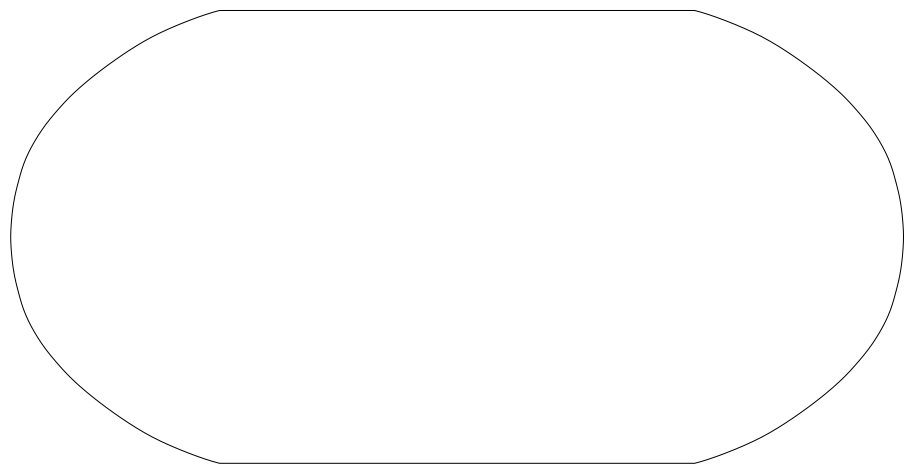

In [10]:
fig = plt.figure(figsize=(16,12))

#area = ccrs.Mercator(central_longitude=central_long, min_latitude=max_lat, max_latitude= min_lat, globe=None)
area = ccrs.Robinson(globe=None)
ax = fig.add_subplot(1, 1, 1, projection=area )
p1 = ax.scatter(data.long, data.lat, c=data.mag_lev_trd, transform=ccrs.Geodetic(),  s=10.0, cmap='RdBu_r', alpha=0.5)
p2 = plt.scatter(data2.Lon, data2.Lat, s=50.0, c =data2.Gz, transform=ccrs.Geodetic(), marker='.', cmap='jet' )
#p1 = ax.scatter(data2.Lon, data2.Lat, c=data2.Gz, transform=ccrs.Geodetic(globe=None),  s=10.0, cmap='RdBu_r', alpha=0.5)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Anomalia Campo total - (nT) ',fontsize=15, rotation = 0)

ax.coastlines(resolution='10m')
ax.gridlines()
plt.show()

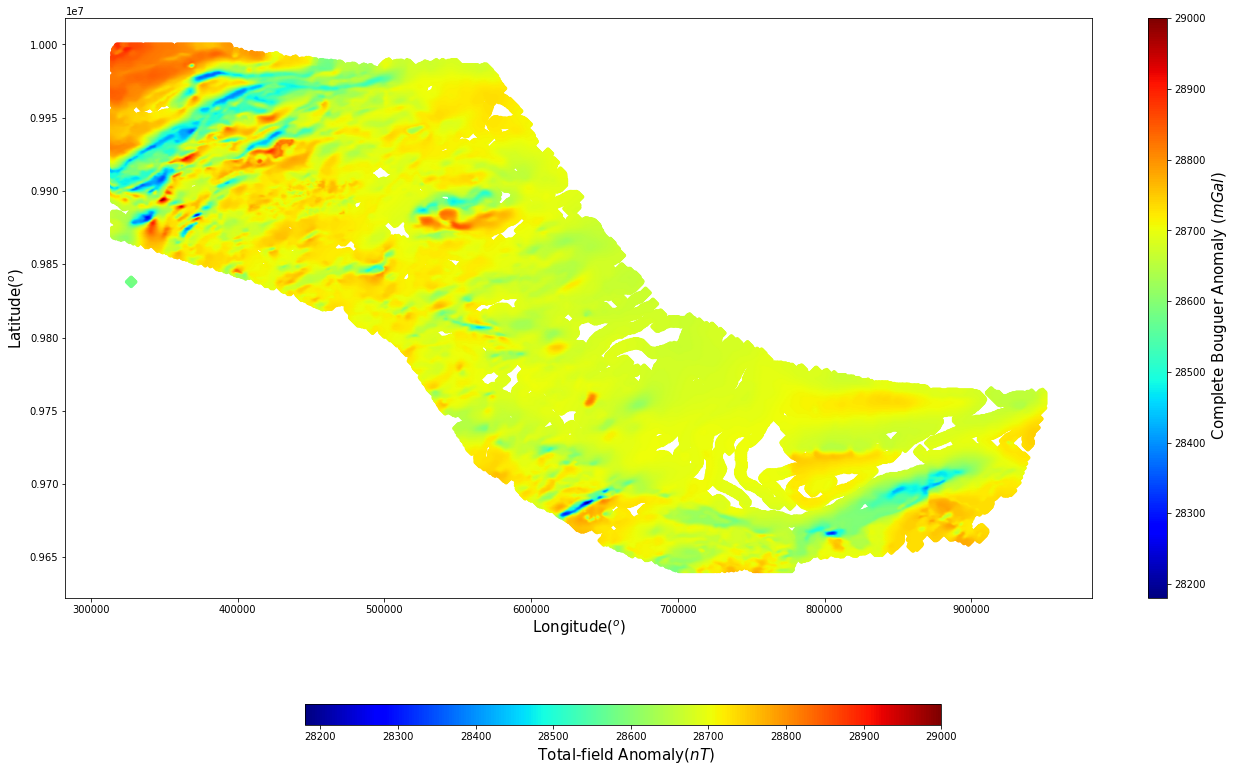

In [18]:
# ------------ plot the flight lines to check for the interpolation:--------#
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,13), facecolor='w')

#plt.subplot(1,2,1)
#plt.title('Mag data - Barreirinhas Basin',fontsize=15)
plt.xlabel('Longitude($^o$)', fontsize = 15)
plt.ylabel('Latitude($^o$)', fontsize = 15)
p1 = plt.scatter(data.X, data.Y, s=30.0, c=data.mag_fin, marker='.', cmap=plt.cm.jet)
#p2 = plt.scatter(data2.Lon, data2.Lat, s=50.0, c =data2.Gz, marker='.', cmap='RdBu_r' )
cbar1 = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar1.set_label(' Total-field Anomaly$ (nT) $',fontsize=15, rotation = 0)

cbar2 = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="vertical")
cbar2.set_label(' Complete Bouguer Anomaly $ (mGal) $',fontsize=15, rotation = 90)

###########################################################################################################################

#plt.subplot(1,2,2)
#plt.title('Mag data - Barreirinhas Basin',fontsize=15)
#plt.xlabel('Longitude($^o$)', fontsize = 15)
#plt.ylabel('Latitude($^o$)', fontsize = 15)
#p2 = plt.scatter(data.long, data.lat, s=10.0, c=data.mag_lev_trd, marker='.', cmap=plt.cm.rainbow)
#cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
#cbar.set_label(' Total-field anomaly $ (nT) $',fontsize=15, rotation = 0)
#plt.savefig('fig3.png', dpi=200, transparent=False, bbox_inches='tight')

plt.show()